In [1]:
# %%
import geoutils.geodata.base_dataset as bds
import geoutils.plotting.plots as cplt
from importlib import reload
import climnet.datasets.evs_dataset as cds


In [6]:
name = 'mswep'
grid_type = 'fekete'
grid_step = 2.5

vname = 'pr'

start_month = 'Jun'
end_month = 'Sep'

output_folder = 'summer_monsoon'

output_dir = '/home/strnad/data/climnet/outputs/'
plot_dir = '/home/strnad/data/climnet/plots/'
data_dir = "/home/strnad/data/climate_data/"


In [7]:
if name == 'mswep':
    fname = data_dir + f'mswep_pr_{grid_step}_1979_2021_ds.nc'
elif name == 'trmm':
    fname = data_dir + 'trmm_pr_{grid_step}_1998_2020_ds.nc'

In [9]:
q_ee = 0.9  # quantile for extreme events
th_eev = 15 # threshold for extreme events
min_evs = 3  # minimum number of extreme events per time series
sp_grid = f'{grid_type}_{grid_step}.npy'

ds = cds.EvsDataset(fname,
                    month_range=[start_month, end_month],
                    grid_step=grid_step,
                    grid_type=grid_type,
                    q=q_ee,
                    th_eev=th_eev,
                    min_evs=min_evs,
                    sp_grid=sp_grid,  # spatial grid for the network as Fekete grid 
                    )

Start processing data!
3d object transposed to lat-lon-time!
Sorted longitudes and latitudes in ascending order!
Set time to np.datetime[ns] time format!
set hours to 0
Different grid step in lon 2.52 and lat 2.53 direction!
Finished processing data
Start create grid fekete...
Try to load grid fekete_2.5.npy...
File /home/strnad/climnet/monsoon/climnet/grid/grids//fekete_2.5.npy exists!
Load...
File location: /home/strnad/climnet/monsoon/climnet/grid/grids/fekete_2.5.npy
File size: 93.87 KB
Loaded grid /home/strnad/climnet/monsoon/climnet/grid/grids//fekete_2.5.npy!
Set variable name to pr!


Intpo100%|██████████████████████████████| 15339/15339 [02:44<00:00, 93.23it/s] 


WARNING! No mask initialized!
Compute Event synchronization for variable pr.
Create EVS with EE defined by q > 0.9
Get month range data from year 1979 to 2021!
Select data from Jun - Sep!
Start remove values below q=0.9 and at least with q_value >= 15 ...


/home/strnad/anaconda3/envs/climnet/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1395: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


Remove cells without min number of events: 3
Now create binary event series!
Done!


In [19]:
ds.mask

<xarray.DataArray 'pr' (points: 5981)>
array([1, 1, 1, ..., 1, 0, 1])
Coordinates:
  * points    (points) int64 0 1 2 3 4 5 6 ... 5975 5976 5977 5978 5979 5980
    lon       (points) float64 5.814 -9.561 14.91 52.73 ... -30.56 -11.7 -54.55
    lat       (points) float64 9.982 -59.84 -27.98 ... -4.263 -9.765 -16.86
    quantile  float64 0.9

In [12]:
# %%
name_prefix = f"{name}_{grid_type}_{grid_step}_{q_ee}"

dataset_file = output_dir + \
    f"/{output_folder}/{name_prefix}_evs_ds.nc"
ds.save(dataset_file)


File /home/strnad/data/climnet/outputs//summer_monsoon/mswep_fekete_2.5_0.9_evs_ds.nc written!
File location: /home/strnad/data/climnet/outputs/summer_monsoon/mswep_fekete_2.5_0.9_evs_ds.nc
File size: 1.03 GB


/home/strnad/climnet/geoutils/geoutils/plotting/map_plots.py:1058: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/home/strnad/climnet/geoutils/geoutils/plotting/plotting_utils.py:448: MatplotlibDeprecationWarning: The 'norm' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = fig.colorbar(


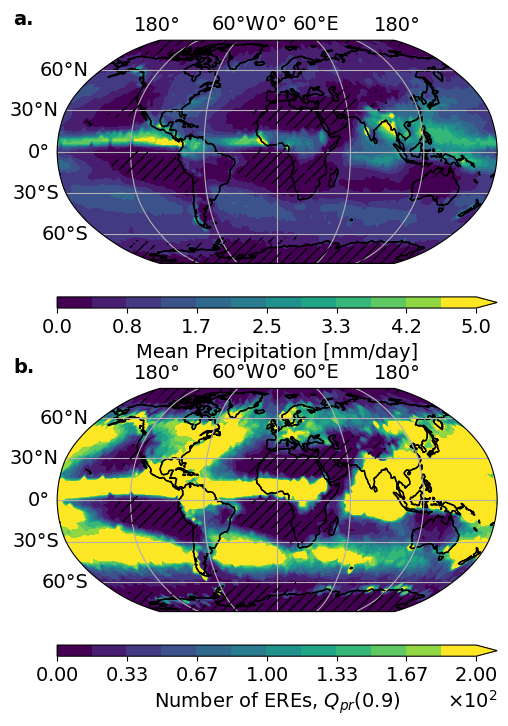

In [17]:
# Plot together EEs and Q-values
reload(cplt)

num_eres = ds.ds.evs.sum(dim='time')
mean_pr = ds.ds.pr.mean(dim='time')
fdic = cplt.create_multi_plot(
    2, 1,
    figsize=(8, 8),
    wspace=0.15,
    hspace=0.3,
    projection="Robinson",
    # lat_range=[-50, 50]
    )
cplt.plot_map(
    mean_pr,
    ax=fdic["ax"][0],
    ds=ds,
    significance_mask=True,
    plot_type="contourf",
    label=f"Mean Precipitation [mm/day]",
    orientation="horizontal",
    vmin=0,
    vmax=5,
    levels=12,
    cmap="viridis",
    tick_step=2,
    round_dec=1,
)

im = cplt.plot_map(
    num_eres,
    ax=fdic["ax"][1],
    ds=ds,
    significance_mask=True,
    plot_type="contourf",
    label=rf"Number of EREs, $Q_{{pr}}({{{ds.ds.evs.q}}})$",
    orientation="horizontal",
    vmin=0,
    vmax=200,
    levels=12,
    tick_step=2,
    round_dec=1,
    cmap="viridis",
)